# Project: DaXiGua Agency

In [22]:
from State import State
from Movement_evaluation import evaluate_by_gravity
import numpy as np
import random
import time
from Ball import Ball
from Config import *
from Game import Game

## Test the movement evaluation

运动规则如下：

1. 所有球受重力影响下坠
2. 与墙壁和地板的碰撞无反弹
3. 有空气阻力，小球下落速度越大阻力越大
4. 所有球之间的碰撞有一定的速度损失，并非完全弹性碰撞
5. 两个同样大小的小球相撞后合成新的小球，新的小球半径增大50% （这一条需根据具体游戏规则再进行修改）

In [2]:
state_test_1 = State(screen_x, 
                     screen_y, 
                     [Ball(np.array([200, 555]), np.array([-10, -10.0]), ball_level = 1), 
                      Ball(np.array([100, 60]), np.array([20, 0]), ball_level = 2),
                      Ball(np.array([200, 60]), np.array([0, 0]), ball_level = 1),
                      Ball(np.array([300, 200]), np.array([0, 0]), ball_level = 0)],
                     end_line)

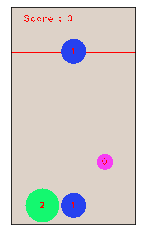

In [3]:
state_test_1.plot_state(is_plt=True)

### Initial State
<img src = "figures/sample_2.jpg" width="200"/>

In [4]:
state_test_1, obtained_score = evaluate_by_gravity(state_test_1, plot=False, verbose = True)
print(obtained_score)

Remove a cherry, obtain 2 score
Remove a orange, obtain 3 score
5


In [5]:
state_test_1.plot_state()

### State after evaluation
<img src = "figures/sample_2_res.jpg" width="200"/>

## Test game

In [6]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)

In [7]:
# the inital state of the game
game.current_state.plot_state()

### Step 0
<img src = "figures/sample_game_step0.jpg" width="200"/>

In [8]:
# We drop the ball from the middle of the screen
action = screen_x/2
next_state, reward, is_finish = game.next_step(action)

In [10]:
next_state.plot_state()

### Step 1
The green ball drops to the bottom, and a new blue ball is added
<img src = "figures/sample_game_step1.jpg" width="200"/>

# Test Environment with a Random Agent

In [18]:
class Random_Agent(object):
        
    def get_action(self, state):
        
        return random.randint(0, int(state.screen_x))

In [19]:
def play_one_episode(game, agent):
    is_finish = False
    current_state = game.init_state()
    reward_recorder = []

    while not is_finish:

        action = agent.get_action(current_state)
        next_state, reward, is_finish = game.next_step(action, verbose = False)
        reward_recorder.append(reward)
        current_state = next_state
    
    return sum(reward_recorder), reward_recorder

In [23]:
random_agent = Random_Agent()

final_rewards = []

start_time = time.time()
for i in range(100):
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    R, _ = play_one_episode(game, random_agent)
    print(i, "\t th episode: ", R)
    final_rewards.append(R)
end_time = time.time()

print( (end_time - start_time)//60 )

The game is finish.
0 	 th episode:  2270
The game is finish.
1 	 th episode:  3442
The game is finish.
2 	 th episode:  3070
The game is finish.
3 	 th episode:  1543
The game is finish.
4 	 th episode:  759
The game is finish.
5 	 th episode:  1969
The game is finish.
6 	 th episode:  3087
The game is finish.
7 	 th episode:  1390
The game is finish.
8 	 th episode:  1510
The game is finish.
9 	 th episode:  1082
The game is finish.
10 	 th episode:  2194
The game is finish.
11 	 th episode:  794
The game is finish.
12 	 th episode:  1499
The game is finish.
13 	 th episode:  1402
The game is finish.
14 	 th episode:  2471
The game is finish.
15 	 th episode:  1177
The game is finish.
16 	 th episode:  840
The game is finish.
17 	 th episode:  1902
The game is finish.
18 	 th episode:  789
The game is finish.
19 	 th episode:  2068
The game is finish.
20 	 th episode:  2366
The game is finish.
21 	 th episode:  2632
The game is finish.
22 	 th episode:  2045
The game is finish.
23 	 

In [14]:
from matplotlib import pyplot as plt

(array([10., 19., 20., 21., 15.,  7.,  5.,  2.,  0.,  1.]),
 array([  76. ,  543.8, 1011.6, 1479.4, 1947.2, 2415. , 2882.8, 3350.6,
        3818.4, 4286.2, 4754. ]),
 <a list of 10 Patch objects>)

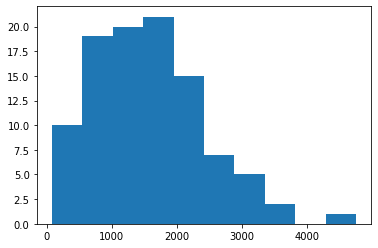

In [24]:
plt.hist(final_rewards)